# How to create branches for parallel node execution¶

LangGraph natively supports fan-out and fan-in using either regular edges or conditionalEdges.

This lets you run nodes in parallel to speed up your total graph execution.

Below are some examples showing how to add create branching dataflows that work for you.



In [2]:
import { END, START, StateGraph, Annotation } from "@langchain/langgraph";

const StateAnnotation = Annotation.Root({
  aggregate: Annotation<string[]>({
    reducer: (x, y) => x.concat(y),
  })
});

// Create the graph
const nodeA = (state: typeof StateAnnotation.State) => {
  console.log(`Adding I'm A to ${state.aggregate}`);
  return { aggregate: [`I'm A`] };
};
const nodeB = (state: typeof StateAnnotation.State) => {
  console.log(`Adding I'm B to ${state.aggregate}`);
  return { aggregate: [`I'm B`] };
};
const nodeC = (state: typeof StateAnnotation.State) => {
  console.log(`Adding I'm C to ${state.aggregate}`);
  return { aggregate: [`I'm C`] };
};
const nodeD = (state: typeof StateAnnotation.State) => {
  console.log(`Adding I'm D to ${state.aggregate}`);
  return { aggregate: [`I'm D`] };
};

const builder = new StateGraph(StateAnnotation)
  .addNode("a", nodeA)
  .addEdge(START, "a")
  .addNode("b", nodeB)
  .addNode("c", nodeC)
  .addNode("d", nodeD)
  .addEdge("a", "b")
  .addEdge("a", "c")
  .addEdge("b", "d")
  .addEdge("c", "d")
  .addEdge("d", END);

const graph = builder.compile();

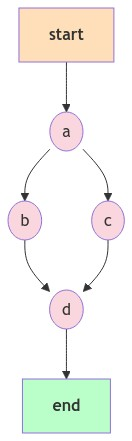

In [ ]:
const representation = graph.getGraph();
const image = await representation.drawMermaidPng();
const unit8Array = await image.bytes();

Deno.jupyter.image(unit8Array);

In [9]:
// Invoke the graph
const baseResult = await graph.invoke({ aggregate: [] });
console.log("Base Result: ", baseResult);

Adding I'm A to 
Adding I'm B to I'm A
Adding I'm C to I'm A
Adding I'm D to I'm A,I'm B,I'm C
Base Result:  { aggregate: [ "I'm A", "I'm B", "I'm C", "I'm D" ] }
